# Logistic Regression:
In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

In [102]:
import pandas as pd
data = pd.read_csv("titanic-passengers.csv",sep =";")
# Head of the Dataset
data.head(2)
#data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [103]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
data.Age.fillna(data.Age.mean(),inplace = True)

In [105]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
data = data.drop(["Cabin"],axis = 1)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S


In [107]:
print(data.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [108]:
data.Embarked.fillna(data.Embarked.value_counts().index[0],inplace =True)

In [109]:
print(data.Embarked.value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [110]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [111]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S


In [112]:
data = data.drop(["PassengerId","Name","Name"],axis = 1)
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,male,28.0,0,0,248740,13.0000,S
1,No,3,male,25.0,0,0,348123,7.6500,S
2,No,3,male,20.0,0,0,350050,7.8542,S


In [113]:
# Replacing Categorical to Numerical 
# Label encoder function On Embarked
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.Embarked =encoder.fit_transform(data.Embarked)

In [114]:
data.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
888,No,3,female,30.000000,0,0,315084,8.6625,2
889,No,3,male,29.699118,0,0,349215,7.8958,2
890,Yes,2,female,19.000000,0,0,250655,26.0000,2


In [115]:
# Replacing Categorical to Numerical 
# Label encoder function On Sex
cleanup={"Sex":{"male":1, "female": 0}}  
data.replace(cleanup, inplace=True)

In [116]:
#preparing data for logistic regression
data["Survived"]=data["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical

In [117]:
data.tail(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
888,0,3,0,30.000000,0,0,315084,8.6625,2
889,0,3,1,29.699118,0,0,349215,7.8958,2
890,1,2,0,19.000000,0,0,250655,26.0000,2


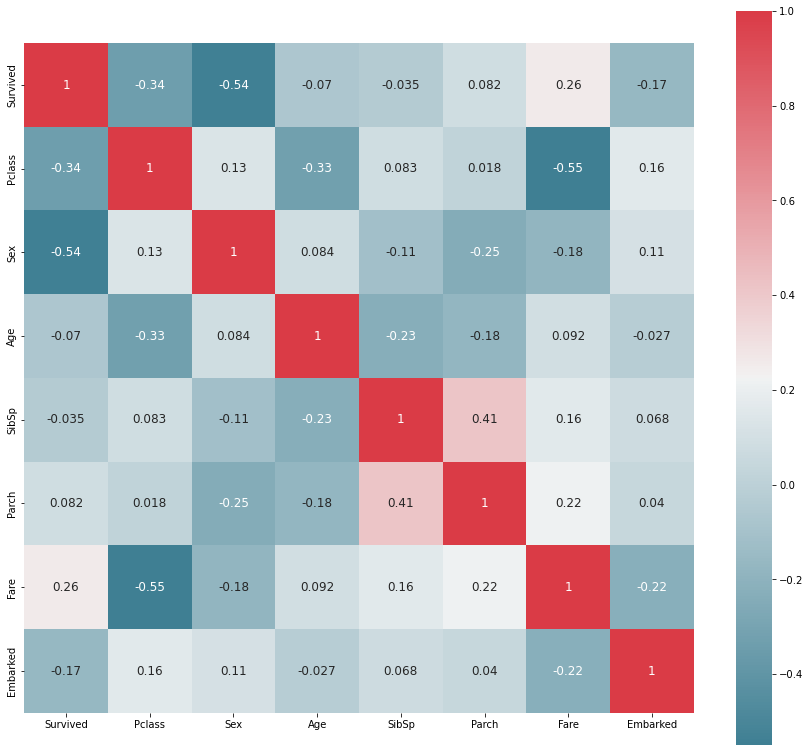

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15, 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
    
plot_correlation_map(data) 

In [119]:
data = data.drop(["Embarked","Fare","Parch","SibSp","Age","Ticket"],axis = 1) # drop Fare Or Pclass 
data.head(3)

,Survived,Pclass,Sex
0,0,2,1
1,0,3,1
2,0,3,1


### Apply logistic regression.

In [120]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['Pclass', 'Sex']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

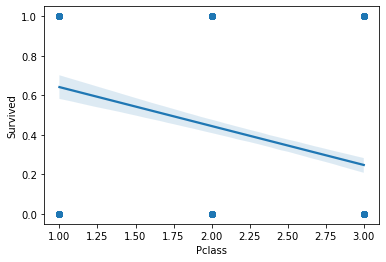

In [121]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

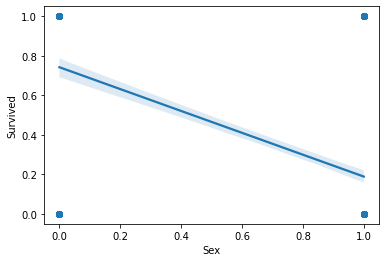

In [122]:
sns.regplot(x='Sex',y='Survived',data=data)

### Use a confusion matrix to validate your model.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

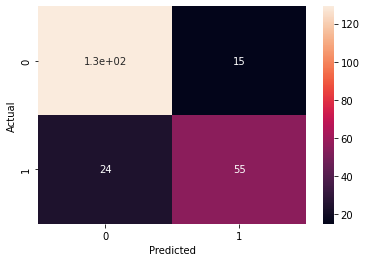

In [124]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [125]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



###  Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

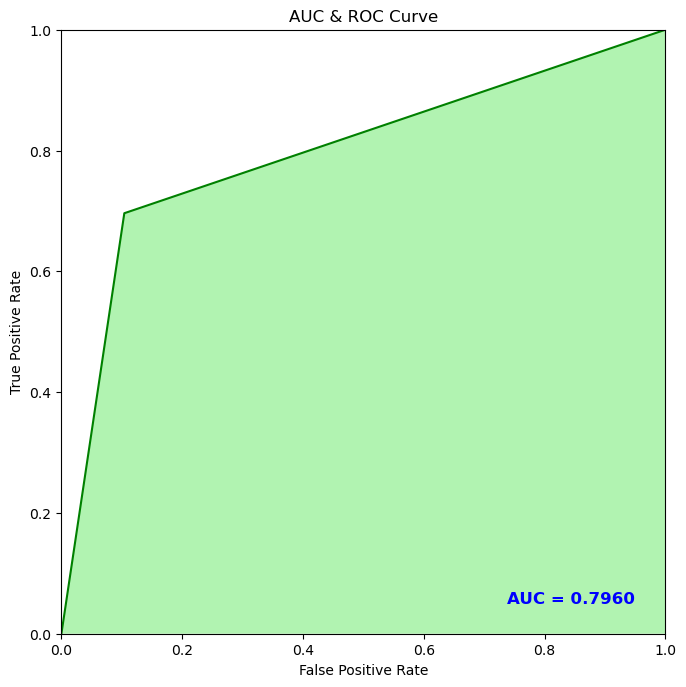

In [126]:
#from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Explanation
The curve that you can see in the above figure is known as the ROC curve and the area under the curve in the above figure is AUC. Whenever the AUC equals 1 then it is the ideal situation for a machine learning model.

The ROC curve represents the true positive rate and the false positive rate at different classification thresholds and the AUC represents the aggregate measure of the machine learning model across all possible classification thresholds. 